In [1]:
import os
import time
import sys
import tarfile
import string
import random
import torch

import numpy as np
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as mimg

from torch.utils.data import DataLoader
from torch.autograd import Variable

%matplotlib inline

# Uploading files

In [2]:
# captcha dataset:
dataset = tarfile.open('dataset.tar')
dataset.extractall()
dataset.close()

# Images from dataset

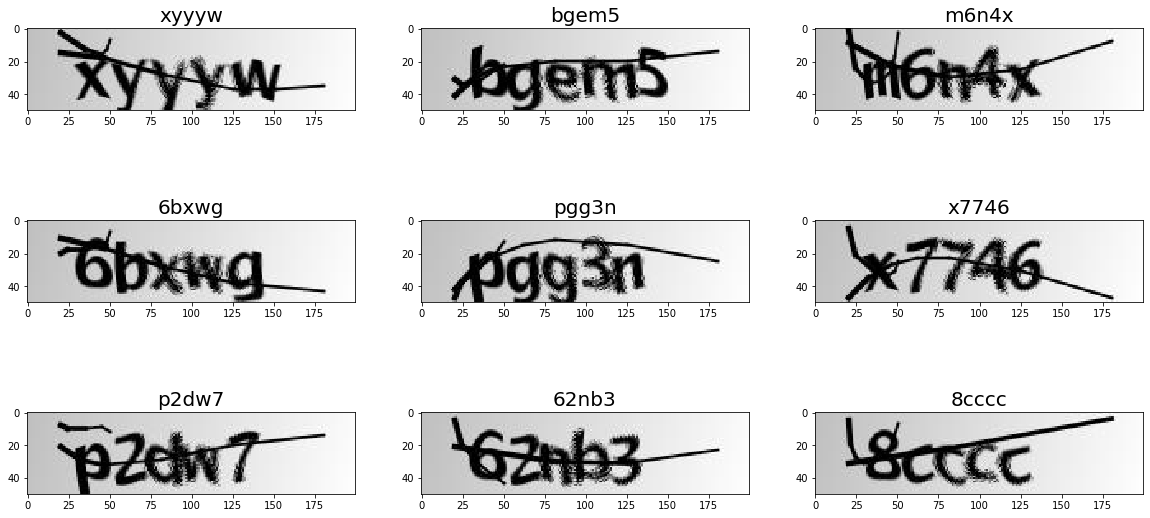

In [2]:
data_path = '../datasets/dataset'

plt.figure(figsize=(20, 10))

for i in range(9):
    file = random.choice(os.listdir(data_path))
    image_path = os.path.join(data_path, file)
    img = mimg.imread(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.title(str(file[:-4]), fontsize=20)
    plt.imshow(img)

# Train and test datasets

In [3]:
transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor()])

In [4]:
sys.path.append('../scripts')

from dataset_creator import train_test_split

train_dataset = train_test_split(data_path, transform=transform)
test_dataset = train_test_split(data_path, is_train=False, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=107, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=1, num_workers=0)

In [5]:
# train_dataset is set to 0.9 part of the initial dataset
len(train_dataset), len(test_dataset)

(963, 107)

In [6]:
# Сomponents of captcha texts
numbers = list(str(i) for i in range(10))
letters = list(string.ascii_lowercase)
all_char = numbers + letters
all_char_len = len(all_char)
captcha_len = 5

# Model

In [7]:
model = models.resnet18(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(in_features=512, out_features=all_char_len * captcha_len, bias=True)
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Model training

In [9]:
device = 'cuda'
model.to(device);
loss_function = torch.nn.MultiLabelSoftMarginLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_arr = [] # for visualization of the training loss

In [10]:
def train_model(model, loss_function, optimizer, num_epochs=30):
    
    dataloader = train_dataloader

    for epoch in range(num_epochs):

        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        for iteration, i in enumerate(dataloader):

            img, label_oh, label = i
            img = Variable(img).to(device)
            labels = Variable(label_oh.float()).to(device)
            pred = model(img)
            loss = loss_function(pred, labels)
            optimizer.zero_grad()
            loss_arr.append(float(loss))
            loss.backward()
            optimizer.step()

    return model, loss_arr

In [11]:
train_model(model, loss_function, optimizer)

Epoch 0/29:
Epoch 1/29:
Epoch 2/29:
Epoch 3/29:
Epoch 4/29:
Epoch 5/29:
Epoch 6/29:
Epoch 7/29:
Epoch 8/29:
Epoch 9/29:
Epoch 10/29:
Epoch 11/29:
Epoch 12/29:
Epoch 13/29:
Epoch 14/29:
Epoch 15/29:
Epoch 16/29:
Epoch 17/29:
Epoch 18/29:
Epoch 19/29:
Epoch 20/29:
Epoch 21/29:
Epoch 22/29:
Epoch 23/29:
Epoch 24/29:
Epoch 25/29:
Epoch 26/29:
Epoch 27/29:
Epoch 28/29:
Epoch 29/29:


(ResNet(
   (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace=True)
   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (layer1): Sequential(
     (0): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
     (1): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU

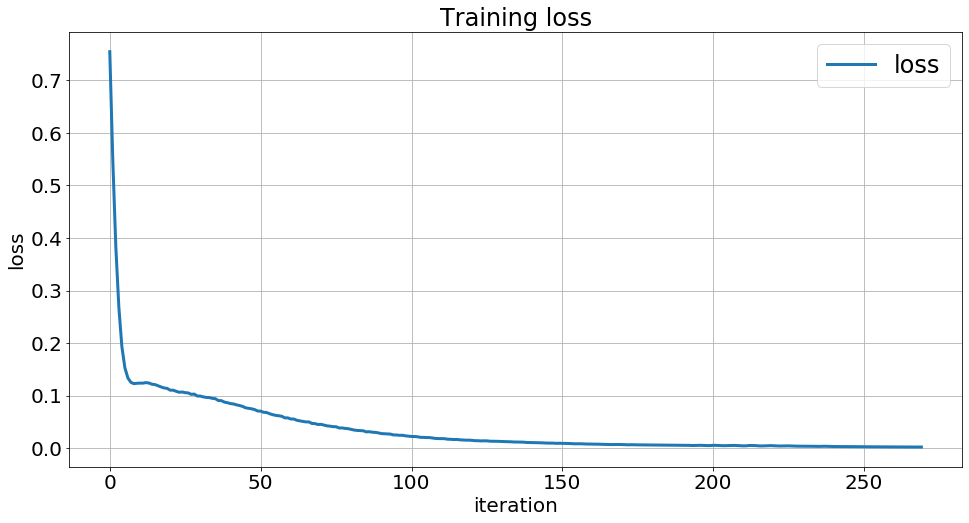

In [12]:
plt.figure(figsize=(16,8))

plt.plot(range(len(loss_arr)), loss_arr, lw=3, label='loss')

plt.grid(True)
plt.legend( prop={'size': 24})
plt.title('Training loss', fontsize=24)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [13]:
torch.save(model.state_dict(), '../models/test_models/resnet18_captcha.pth')

# Quantization

In [16]:
from resnet_quant import resnet18


"""
Resnet_quant is a custom module, where inputs/otnputs are quantized/dequantized using QuantStub/DeQuantStub.
It can be used for quantization/running qauntized models: 'resnet18', 'resnet34', 'resnet50', 'resnet101' and 'resnet152'.

"""

model = resnet18(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(in_features=512, out_features=all_char_len * captcha_len, bias=True)

checkpoint = torch.load('../models/test_models/resnet18_captcha.pth')
model.load_state_dict(checkpoint)

""" 
Here post-training static quantization method is used.

"""
modules_to_fuse = [['conv1', 'bn1'],
                   ['layer1.0.conv1', 'layer1.0.bn1'],
                   ['layer1.0.conv2', 'layer1.0.bn2'],
                   ['layer1.1.conv1', 'layer1.1.bn1'],
                   ['layer1.1.conv2', 'layer1.1.bn2'],
                   ['layer2.0.conv1', 'layer2.0.bn1'],
                   ['layer2.0.conv2', 'layer2.0.bn2'],
                   ['layer2.0.downsample.0', 'layer2.0.downsample.1'],
                   ['layer2.1.conv1', 'layer2.1.bn1'],
                   ['layer2.1.conv2', 'layer2.1.bn2'],
                   ['layer3.0.conv1', 'layer3.0.bn1'],
                   ['layer3.0.conv2', 'layer3.0.bn2'],
                   ['layer3.0.downsample.0', 'layer3.0.downsample.1'],
                   ['layer3.1.conv1', 'layer3.1.bn1'],
                   ['layer3.1.conv2', 'layer3.1.bn2'],
                   ['layer4.0.conv1', 'layer4.0.bn1'],
                   ['layer4.0.conv2', 'layer4.0.bn2'],
                   ['layer4.0.downsample.0', 'layer4.0.downsample.1'],
                   ['layer4.1.conv1', 'layer4.1.bn1'],
                   ['layer4.1.conv2', 'layer4.1.bn2']]
    
model_quantized = model
model_quantized.eval();

torch.backends.quantized.engine = 'qnnpack'

model_quantized = torch.quantization.fuse_modules(model_quantized, modules_to_fuse)
model_quantized.qconfig = torch.quantization.get_default_qconfig('qnnpack')
torch.quantization.prepare(model_quantized, inplace=True)
model_quantized.eval();

with torch.no_grad():
    for m, i in enumerate(train_dataloader):
        print(m)
        img, label_oh, label = i
        img = Variable(img)
        model_quantized(img)
        
torch.quantization.convert(model_quantized, inplace=True)

0
1
2
3
4
5
6
7
8


/home/ml/miniconda3/envs/fashion-look/lib/python3.7/site-packages/torch/quantization/observer.py:990: UserWarning: must run observer before calling calculate_qparams.                                    Returning default scale and zero point 
  Returning default scale and zero point "


ResNet(
  (conv1): QuantizedConv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), scale=0.0192549005150795, zero_point=123, padding=(3, 3))
  (bn1): Identity()
  (relu): QuantizedReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): QuantizedConv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), scale=0.016727076843380928, zero_point=143, padding=(1, 1))
      (bn1): Identity()
      (relu): QuantizedReLU(inplace=True)
      (conv2): QuantizedConv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), scale=0.021190177649259567, zero_point=121, padding=(1, 1))
      (bn2): Identity()
      (skip_add): QFunctional(
        scale=0.02237674966454506, zero_point=114
        (activation_post_process): Identity()
      )
      (quant): Quantize(scale=tensor([1.]), zero_point=tensor([0]), dtype=torch.quint8)
      (dequant): DeQuantize()
    )
    (1): BasicBlock(
      (conv1): QuantizedConv2d(64, 6

In [17]:
torch.save(model_quantized.state_dict(), '../models/test_models/resnet18_captcha_quantized.pth')

# Test

In [14]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    size=os.path.getsize("temp.p")
    print('Size (KB):', size/1e3)
    os.remove('temp.p')
    
def test(model, device, test_loader):
    
    model.to(device)
    model.eval();
       
    print_size_of_model(model)

    predicted_labels = []
    true_labels = []
    
    correct = 0

    with torch.no_grad():

        for i, (img, label_oh, label) in enumerate(test_dataloader):

            img = Variable(img).to(device)
            st = time.time()
            pred = model(img)
            et = time.time()

            s_0 = all_char[np.argmax(pred.squeeze().cpu().tolist()[0:all_char_len])]
            s_1 = all_char[np.argmax(pred.squeeze().cpu().tolist()[all_char_len:all_char_len * 2])]
            s_2 = all_char[np.argmax(pred.squeeze().cpu().tolist()[all_char_len * 2:all_char_len * 3])]
            s_3 = all_char[np.argmax(pred.squeeze().cpu().tolist()[all_char_len * 3:all_char_len * 4])]
            s_4 = all_char[np.argmax(pred.squeeze().cpu().tolist()[all_char_len * 4:all_char_len * 5])]
            captcha = '%s%s%s%s%s' % (s_0, s_1, s_2, s_3, s_4)
            
            true_labels.append(label[0])
            predicted_labels.append(captcha)
            
            if label[0] == captcha:
                correct += 1
    
    print("========================================= PERFORMANCE =============================================")
    print('Accuracy: {}/{} ({:.2f}%)\n'.format(correct, len(test_dataloader), 100. * correct / len(test_dataloader)))
    print('Elapsed time = {:0.4f} milliseconds'.format((et - st) * 1000))
    print("====================================================================================================")
    
    return predicted_labels, true_labels

In [19]:
"""
LOADING MODELS FROM CHECKPOINTS

"""

# RESNET-18

model = models.resnet18(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(in_features=512, out_features=all_char_len * captcha_len, bias=True)

checkpoint = torch.load('../models/test_models/resnet18_captcha.pth')
model.load_state_dict(checkpoint)

# QUANTIZED RESNET-18

from resnet_quant import resnet18

modules_to_fuse = [['conv1', 'bn1'],
                   ['layer1.0.conv1', 'layer1.0.bn1'],
                   ['layer1.0.conv2', 'layer1.0.bn2'],
                   ['layer1.1.conv1', 'layer1.1.bn1'],
                   ['layer1.1.conv2', 'layer1.1.bn2'],
                   ['layer2.0.conv1', 'layer2.0.bn1'],
                   ['layer2.0.conv2', 'layer2.0.bn2'],
                   ['layer2.0.downsample.0', 'layer2.0.downsample.1'],
                   ['layer2.1.conv1', 'layer2.1.bn1'],
                   ['layer2.1.conv2', 'layer2.1.bn2'],
                   ['layer3.0.conv1', 'layer3.0.bn1'],
                   ['layer3.0.conv2', 'layer3.0.bn2'],
                   ['layer3.0.downsample.0', 'layer3.0.downsample.1'],
                   ['layer3.1.conv1', 'layer3.1.bn1'],
                   ['layer3.1.conv2', 'layer3.1.bn2'],
                   ['layer4.0.conv1', 'layer4.0.bn1'],
                   ['layer4.0.conv2', 'layer4.0.bn2'],
                   ['layer4.0.downsample.0', 'layer4.0.downsample.1'],
                   ['layer4.1.conv1', 'layer4.1.bn1'],
                   ['layer4.1.conv2', 'layer4.1.bn2']]

torch.backends.quantized.engine = 'qnnpack'

model_quantized = resnet18(pretrained=True)
model_quantized.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model_quantized.fc = torch.nn.Linear(in_features=512, out_features=all_char_len * captcha_len, bias=True)

model_quantized.qconfig = torch.quantization.get_default_qconfig('qnnpack')

model_quantized.eval();

model_quantized = torch.quantization.fuse_modules(model_quantized, modules_to_fuse)
torch.quantization.prepare(model_quantized, inplace=True)
torch.quantization.convert(model_quantized, inplace=True)

checkpoint = torch.load('../models/test_models/resnet18_captcha_quantized.pth')
model_quantized.load_state_dict(checkpoint)

<All keys matched successfully>

In [20]:
device = 'cuda'
test(model, device, test_dataloader)

Size (KB): 45131.641
========================================= PERFORMANCE =============================================
Accuracy: 84/107 (78.50%)

Elapsed time = 8.1081 milliseconds


(['82fx2',
  'ny3nn',
  '5bg8f',
  'ncw4g',
  '5n3w4',
  'nbwpn',
  'ndyfe',
  'wgmwp',
  'e2d66',
  'n8xdd',
  'xc68n',
  'exycn',
  'wd2gb',
  'f454x',
  'e25xg',
  'b5dn4',
  'y7mnm',
  'xemyg',
  'dn5df',
  'x8xnp',
  'mdyp7',
  'pmg55',
  'gce6f',
  '8fexn',
  'mnnf4',
  '8n5p3',
  '5gcd3',
  '3ym7f',
  'p4pde',
  'defyx',
  'e7x45',
  'n2c85',
  'b4ncn',
  'c482b',
  'e8e5e',
  '63pxe',
  '43p5d',
  'e76n4',
  'mmg38',
  'efg72',
  'dcnp8',
  '8d2nd',
  'mcg43',
  'de7f3',
  'd3c7y',
  'gdng3',
  '373gb',
  'p24gn',
  'neecd',
  'g888x',
  'nx5wg',
  '44c22',
  'n4cpy',
  'gnc3n',
  'ggd7m',
  'n3x4c',
  '56m6y',
  'n5cm7',
  'md4bm',
  '5325m',
  '6b4nf',
  'n464c',
  '85pew',
  'nxx25',
  'c5556',
  'gn2xy',
  'bn5mw',
  'ygenn',
  '7f8b3',
  'wf884',
  'pxdwp',
  '8db67',
  'mxw44',
  'ny3bw',
  'mnmcn',
  'gw55m',
  '85dxn',
  'efe62',
  '467d5',
  'pnnxy',
  '4w76g',
  'n2by7',
  'cbcbx',
  'gnbde',
  '5ng6e',
  'p2dw7',
  'pyf65',
  'g8gnd',
  '573d8',
  'gxxpf',
  'd3ycn',

In [21]:
device = 'cpu'
test(model_quantized, device, test_dataloader)

Size (KB): 11314.005
========================================= PERFORMANCE =============================================
Accuracy: 83/107 (77.57%)

Elapsed time = 182.6580 milliseconds


(['82fx2',
  'ny3nn',
  '5bg8f',
  'ncw4g',
  '5n3w4',
  'nbwpn',
  'ndyfe',
  'wgmwp',
  'e2d66',
  'n8xdd',
  'xc68n',
  'exycn',
  'wd2gb',
  'f454x',
  'e25xg',
  'b5dn4',
  'y7mnm',
  'xemyg',
  'dn5df',
  'x8xnp',
  'mdyp7',
  'pmg55',
  'gce6f',
  '8fexn',
  'mnnf4',
  '8n5p3',
  '5gcd3',
  '3ym7f',
  'p4pde',
  'defyx',
  'e7x45',
  'n2c85',
  'b4ncn',
  'c482b',
  'e8e5e',
  '63pxe',
  '43p5d',
  'e76n4',
  'mmg38',
  'efg72',
  'dcnp8',
  '8d2nd',
  'mcg43',
  'de7f3',
  'd3c7y',
  'gdng3',
  '373gb',
  'p24gn',
  'neecd',
  'g888x',
  '8x5wg',
  '44c22',
  'n4cpy',
  'gnc3n',
  'ggd7m',
  'n3x4c',
  '56m6y',
  'n5cm7',
  'm74bm',
  '5335m',
  '6b4nf',
  'n464c',
  '85pew',
  'nxx25',
  'c5556',
  'gn2xy',
  'bn5mw',
  'ygenn',
  '7f8b3',
  'wf884',
  'pxdwp',
  '8db67',
  'mxw44',
  'ny3bw',
  'mnncn',
  'gw55m',
  '85dxn',
  'efe62',
  '467d5',
  'pnnxy',
  '4w76g',
  'n2by7',
  'cbcbx',
  'gnbde',
  '5ng6e',
  'p2dw7',
  'pyf65',
  'g8gnd',
  '573d8',
  'gxxpf',
  'd3ycn',